In [1]:
# 导入包：
import sys
sys.path.append('/home/dengruijun/data/FinTech/PP-Split/')

from target_model.data_preprocessing.preprocess_cifar10 import get_cifar10_normalize,deprocess,get_cifar10_fisher_normalize
from target_model.data_preprocessing.preprocess_mnist import get_mnist_normalize


/home/dengruijun/miniconda3/envs/drj-pytorch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_loader, test_loader = get_mnist_normalize(batch_size=1,test_bs=1)
# train_loader, test_loader = get_cifar10_normalize(batch_size=1,test_bs=1)
one_image = next(iter(train_loader))[0]
print(one_image.shape)

torch.Size([1, 1, 28, 28])


In [3]:
print(one_image[0])

tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1

images_pooled:  torch.Size([1, 14, 14])
data.size(): 784


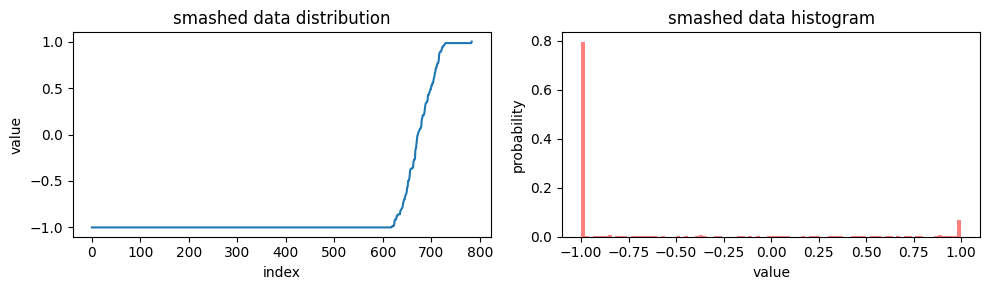

sigma(prob): 0.9999999999999996
counts[0],counts[-1],counts[49] 0.7946429747608035 0.07015307160809661 0.0025510184099256684


In [4]:
# 看分布
import numpy as np
import matplotlib.pyplot as plt

def plot_smashed_distribution(smashed_data,start = -1, end = 1):
    data = smashed_data.flatten().numpy() # 拉平后的数据
    data_sort = np.sort(data) # 排序后的拉平数据
    data_size = np.size(data) # 数据的大小

    print("data.size():",data_size)
    counts, buckets = np.histogram(data, bins=100 if 100 < data_size else data_size, density=True) 
    # counts, buckets = np.histogram(data, bins=10, density=True) 

    # 画图 index-value 图1
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    x_axis = np.arange(0, len(data), 1)
    plt.plot(x_axis, data_sort)
    plt.title('smashed data distribution')
    plt.xlabel('index')
    plt.ylabel('value')

    # 画图 value-probability 图2
    plt.subplot(1,2,2)
    counts = counts/np.sum(counts) # 如果start和end不是[0，1]就都要用
    # edges = np.hstack((buckets,np.array([buckets[-1]+(buckets[1]-buckets[0])]))) # linespace
    edges = buckets # histogram
    plt.stairs(counts,edges,fill=True,color='red', alpha=0.5)
    plt.title('smashed data histogram')
    plt.xlabel('value')
    plt.ylabel('probability')

    plt.subplots_adjust(wspace=0.5)  # 调整水平间距
    plt.tight_layout()  # 自动调整子图布局
    plt.show()
    # plt.savefig(f'smashed_data_distribution{time.time()}.png')
    # 打印信息
    print("sigma(prob):",np.sum(counts)) # 查看counts的量
    print("counts[0],counts[-1],counts[49]",counts[0],counts[-1],counts[49]) # 查看counts的量

from torch.nn.functional import avg_pool2d
pooled_image = avg_pool2d(one_image[0],kernel_size=2)
print('images_pooled: ',pooled_image.shape)
plot_smashed_distribution(one_image[0])